In [14]:
%pylab inline
import numpy as np
import scipy.optimize
import csv

Populating the interactive namespace from numpy and matplotlib


D:\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['array', 'figure']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Monochromatic response of cells

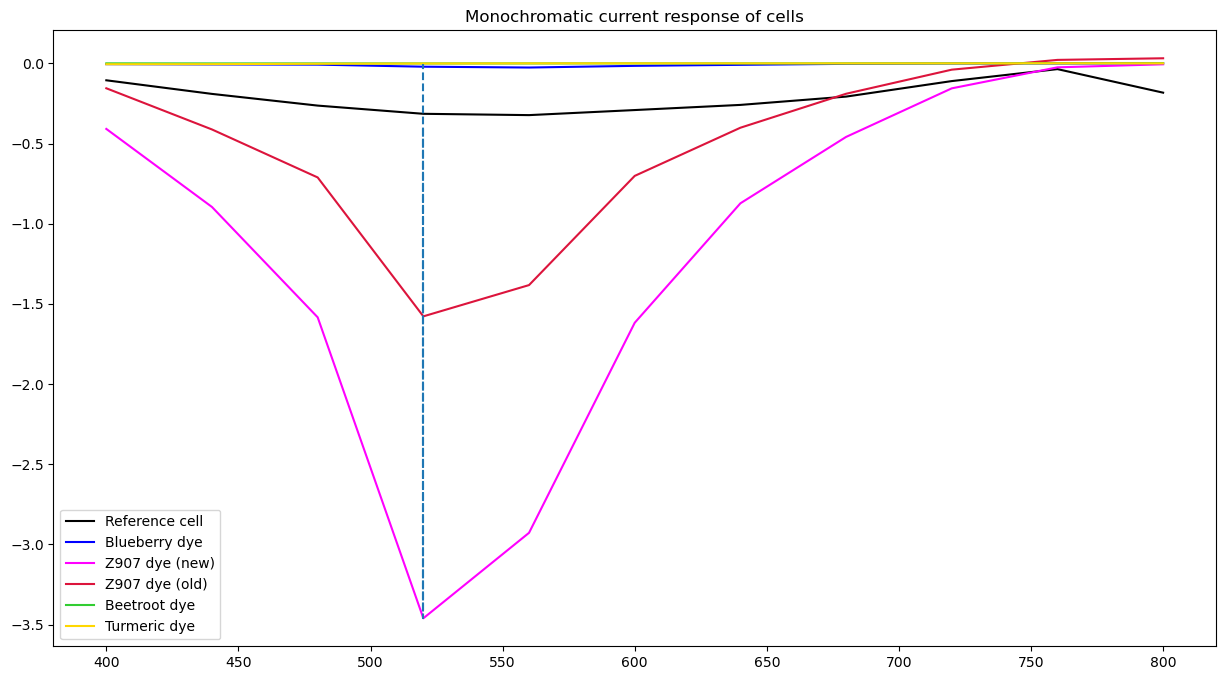

In [39]:
data=open('monochrom.csv','r')
array=[]
for x in data:
    array.append([x])
    
array=array[1:]
wl=[]
ref=[]
blue=[]
z907new=[]
z907old=[]
beet=[]
tur=[]

for y in array:
    y[0]=y[0].split(',')
    wl.append(float(y[0][0]))
    ref.append(-float(y[0][1]))
    blue.append(float(y[0][2]))
    z907new.append(float(y[0][3]))
    z907old.append(float(y[0][4]))
    beet.append(float(y[0][5]))
    tur.append(float(y[0][6]))

figure = figsize(15,8)
plot(wl,ref,label='Reference cell',color='black')
plot(wl,blue,label='Blueberry dye',color='b')
plot(wl,z907new,label='Z907 dye (new)',color='magenta')
plot(wl,z907old,label='Z907 dye (old)',color='crimson')
plot(wl,beet,label='Beetroot dye',color='limegreen')
plot(wl,tur,label='Turmeric dye',color='gold')
plot(520.0+np.array(wl)-np.array(wl),z907new, linestyle='--')
title('Monochromatic current response of cells')
legend()

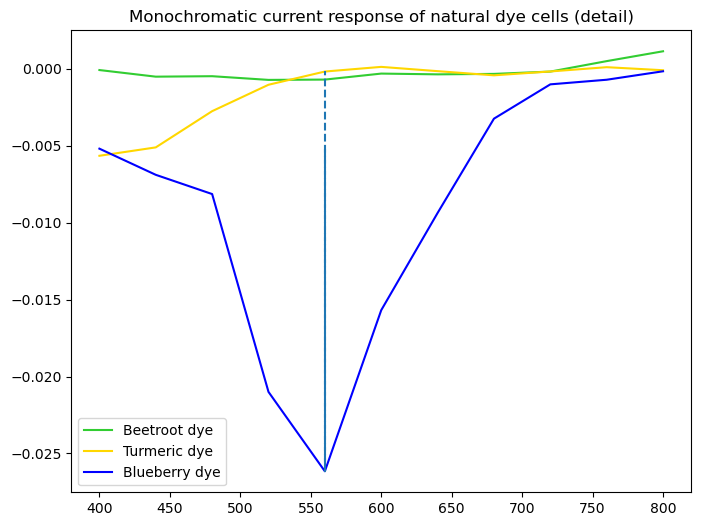

In [42]:
figure = figsize(8,6)

plot(wl,beet,label='Beetroot dye',color='limegreen')
plot(wl,tur,label='Turmeric dye',color='gold')
plot(wl,blue,label='Blueberry dye',color='b')
plot(560.0+np.array(wl)-np.array(wl),blue, linestyle='--')
title('Monochromatic current response of natural dye cells (detail)')
legend()

# Monochromatic IPCE response of cells

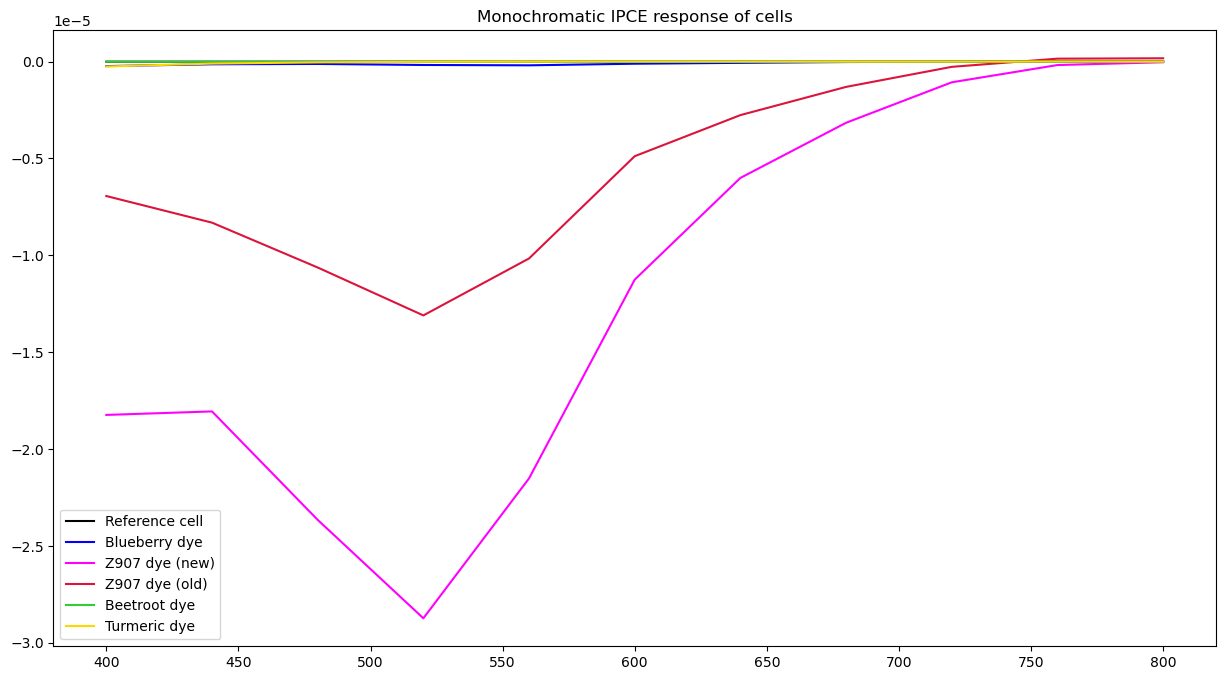

In [40]:
power=np.array([69.6,140,173.19,287.55,301.72,297.46,282.06,265.41,251.75,230.24,284.89])
refipce=(np.array(ref)*6.24E18)/((power*10**-3)/(6.63E-34*3E8/np.array(wl)))
z907newipce=(np.array(z907new)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
z907oldipce=(np.array(z907old)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
blueipce=(np.array(blue)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
beetipce=(np.array(beet)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
turipce=(np.array(tur)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
'''plot(wl,refipce,label='Reference cell')
plot(wl,z907newipce,label='Z907 dye (new)')
plot(wl,z907oldipce,label='Z907 dye (old)')
plot(wl,blueipce,label='Blueberry dye')
plot(wl,beetipce,label='Beetroot dye')
plot(wl,turipce,label='Turmeric dye')'''

plot(wl,refipce,label='Reference cell',color='black')
plot(wl,z907newipce,label='Z907 dye (new)',color='magenta')
plot(wl,z907oldipce,label='Z907 dye (old)',color='crimson')
plot(wl,beetipce,label='Beetroot dye',color='limegreen')
plot(wl,turipce,label='Turmeric dye',color='gold')
plot(wl,blueipce,label='Blueberry dye',color='b')

title('Monochromatic IPCE response of cells')
legend()

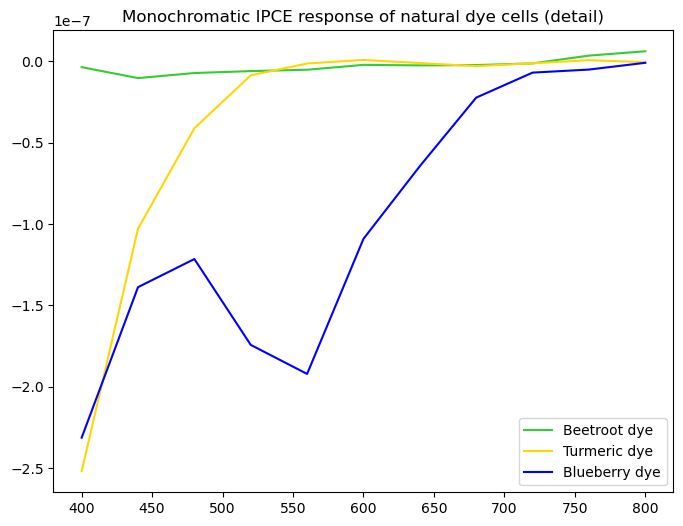

In [43]:
'''plot(wl,blueipce,label='Blueberry dye')
plot(wl,beetipce,label='Beetroot dye')
plot(wl,turipce,label='Turmeric dye')'''
figure = figsize(8,6)

plot(wl,beetipce,label='Beetroot dye',color='limegreen')
plot(wl,turipce,label='Turmeric dye',color='gold')
plot(wl,blueipce,label='Blueberry dye',color='b')

title('Monochromatic IPCE response of natural dye cells (detail)')
legend()

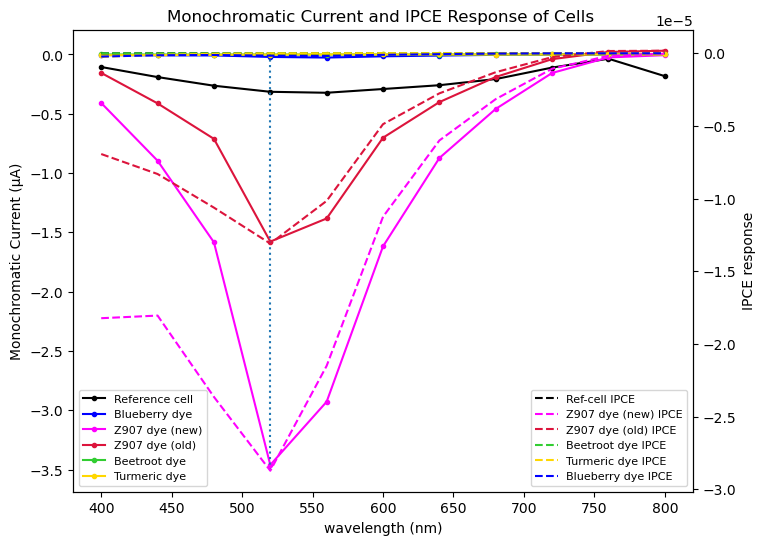

In [70]:
plt.rcParams['figure.figsize'] = [8, 6]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('Monochromatic Current and IPCE Response of Cells ')


ax1.plot(wl,ref,label='Reference cell',color='black',linestyle='-',marker='.')
ax1.plot(wl,blue,label='Blueberry dye',color='b',linestyle='-',marker='.')
ax1.plot(wl,z907new,label='Z907 dye (new)',color='magenta',linestyle='-',marker='.')
ax1.plot(wl,z907old,label='Z907 dye (old)',color='crimson',linestyle='-',marker='.')
ax1.plot(wl,beet,label='Beetroot dye',color='limegreen',linestyle='-',marker='.')
ax1.plot(wl,tur,label='Turmeric dye',color='gold',linestyle='-',marker='.')
ax1.plot(np.array([520,520]),np.array([0,-3.51]), linestyle='dotted')
ax1.legend(prop={'size': 8})


ax2.plot(wl,refipce,label='Ref-cell IPCE',color='black',linestyle='--',marker='')
ax2.plot(wl,z907newipce,label='Z907 dye (new) IPCE',color='magenta',linestyle='--',marker='')
ax2.plot(wl,z907oldipce,label='Z907 dye (old) IPCE',color='crimson',linestyle='--',marker='')
ax2.plot(wl,beetipce,label='Beetroot dye IPCE',color='limegreen',linestyle='--',marker='')
ax2.plot(wl,turipce,label='Turmeric dye IPCE',color='gold',linestyle='--',marker='')
ax2.plot(wl,blueipce,label='Blueberry dye IPCE',color='b',linestyle='--',marker='')


ax1.set_xlabel('wavelength (nm)')
ax1.set_ylabel('Monochromatic Current (μA)')
ax2.set_ylabel('IPCE response')

ax2.legend(loc=4, prop={'size': 8})

plt.show()

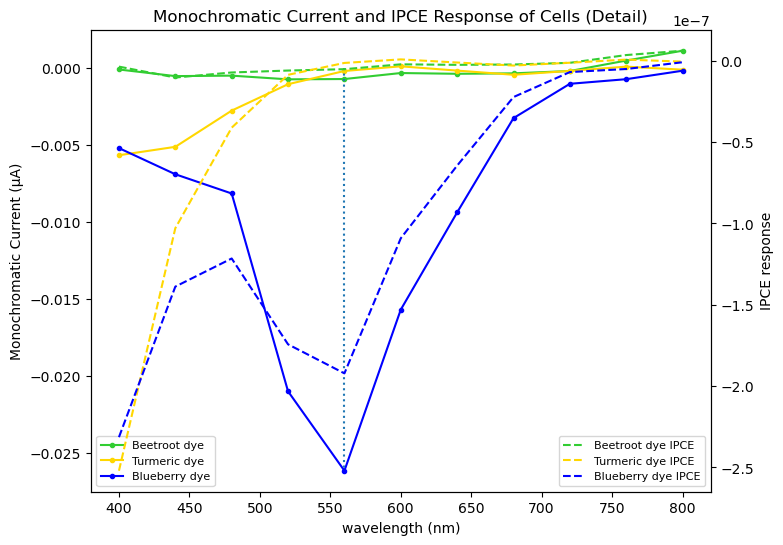

In [79]:
plt.rcParams['figure.figsize'] = [8, 6]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('Monochromatic Current and IPCE Response of Cells (Detail)')



ax1.plot(wl,beet,label='Beetroot dye',color='limegreen',linestyle='-',marker='.')
ax1.plot(wl,tur,label='Turmeric dye',color='gold',linestyle='-',marker='.')
ax1.plot(wl,blue,label='Blueberry dye',color='b',linestyle='-',marker='.')
ax1.plot(np.array([560,560]),np.array([0,-0.02616]), linestyle='dotted')
ax1.legend(prop={'size': 8})


ax2.plot(wl,beetipce,label='Beetroot dye IPCE',color='limegreen',linestyle='--',marker='')
ax2.plot(wl,turipce,label='Turmeric dye IPCE',color='gold',linestyle='--',marker='')
ax2.plot(wl,blueipce,label='Blueberry dye IPCE',color='b',linestyle='--',marker='')
ax2.legend(loc=4, prop={'size': 8})

ax1.set_xlabel('wavelength (nm)')
ax1.set_ylabel('Monochromatic Current (μA)')
ax2.set_ylabel('IPCE response')



plt.show()

In [51]:
plot(560.0+np.array(wl)-np.array(wl),blue, linestyle='--')


[-0.409,
 -0.896,
 -1.584,
 -3.461,
 -2.928,
 -1.618,
 -0.873,
 -0.459,
 -0.156,
 -0.025,
 -0.006]

In [73]:
blue

[-0.00519,
 -0.00689,
 -0.00814,
 -0.021,
 -0.02616,
 -0.01569,
 -0.00937,
 -0.00324,
 -0.00101,
 -0.00071,
 -0.00016]